In [1]:
import pandas as pd
import numpy as np
from configs import configs

In [3]:
df = pd.read_csv(configs['train_label_csv'])

In [6]:
df.mean().round(4)

Enlarged Cardiomediastinum    0.3229
Cardiomegaly                  0.2740
Lung Opacity                  0.3183
Lung Lesion                   0.0895
Edema                         0.1916
Consolidation                 0.1994
Pneumonia                     0.1609
Atelectasis                   0.2230
Pneumothorax                  0.0352
Pleural Effusion              0.1930
Pleural Other                 0.1703
Fracture                      0.2555
Support Devices               0.2445
dtype: float64

In [3]:
df = pd.read_csv(configs['mimic_csv_file_path'])

In [16]:
word_count = df['report'].apply(lambda x: len(x.split()))

In [17]:
word_count.describe()

count    273585.000000
mean         55.623806
std          25.302502
min           3.000000
25%          39.000000
50%          51.000000
75%          67.000000
max         402.000000
Name: report, dtype: float64

<AxesSubplot:>

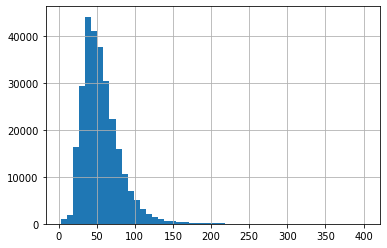

In [18]:
word_count.hist(bins=50)

In [22]:
word_count.quantile(q=0.999)

216.0

In [29]:
pca_mean = None
pca_components = None
def load_pca():
    global pca_mean, pca_components
    pca_mean = np.load('weights/pca_mean.npy')
    pca_components = np.load('weights/pca_components.npy')

load_pca()

In [30]:
pca_mean.shape

(65536,)

In [31]:
pca_components.shape

(1024, 65536)

In [114]:
# Benchmark dataloader
from torch.utils.data import DataLoader
from dataset import ChestXRayCaptionDataset, MultiLabelDataset
from utils import train_transform, evaluate_transform, normalize
from tqdm import tqdm
import torchvision.transforms as transforms

In [111]:
resize_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    normalize
])

In [113]:
data_loader = DataLoader(
    ChestXRayCaptionDataset(
        'all',
        transform=train_transform
    ),
    batch_size=8,
    num_workers=0,
    pin_memory=True
)

for i, obj in enumerate(tqdm(data_loader)):
    if i == 500:
        break

  1%|▏         | 500/34197 [00:12<14:16, 39.35it/s]


In [116]:
data_loader = DataLoader(
    ChestXRayCaptionDataset(
        'all',
        transform=train_transform
    ),
    batch_size=8,
    num_workers=0,
    pin_memory=True
)

for i, obj in enumerate(tqdm(data_loader)):
    img = obj[0].cuda()
    reports = obj[1].cuda()
    if i == 500:
        break

  1%|▏         | 500/34197 [00:17<19:21, 29.00it/s] 


In [115]:


data_loader = DataLoader(
    MultiLabelDataset(
        'train',
        transform=train_transform,
    ),
    batch_size=8,
    num_workers=0,
    pin_memory=True
)

for i, obj in enumerate(tqdm(data_loader)):
    if i == 500:
        break

 39%|███▉      | 500/1283 [00:12<00:19, 40.62it/s]


In [3]:
train_df = pd.read_csv(configs['train_csv'])
val_df = pd.read_csv(configs['val_csv'])
test_df = pd.read_csv(configs['test_csv'])

In [12]:
def transform_name(p):
    return configs['mimic_dir'] + 'images256/' + p.split('/')[-1]



In [15]:
train_df['img_path_256'] = train_df['img_path'].apply(transform_name)
val_df['img_path_256'] = val_df['img_path'].apply(transform_name)
test_df['img_path_256'] = test_df['img_path'].apply(transform_name)

In [17]:
train_df.to_csv(configs['train_csv'], index=False)
val_df.to_csv(configs['val_csv'], index=False)
test_df.to_csv(configs['test_csv'], index=False)